In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.special import gammaln
from scipy.stats import ttest_1samp, jarque_bera
from statsmodels.tsa.stattools import adfuller


In [3]:
symbols = ['^AEX', '^BFX', '^GDAXI']
start_date = '2010-01-01'
start_date = '2000-01-01'
end_date = '2022-04-08'
vPrices = yf.download(symbols, start=start_date, end=end_date)['Close'].dropna()
vReturns = vPrices.pct_change().dropna()
vReturns = np.log(vPrices / vPrices.shift(1)).dropna() *100
vNpReturns = np.array(vReturns.transpose())
vTrain = vNpReturns[:,:int(len(vNpReturns[0,:]) * 0.8)]
vTest = vNpReturns[:,int(len(vNpReturns[0,:]) * 0.8):]



[*********************100%***********************]  3 of 3 completed


In [3]:


for i in range(3):
    
    # Calculate basic statistics
    mean_returns = vNpReturns[i,:].mean()
    std_returns = vNpReturns[i,:].std()
    min_returns = vNpReturns[i,:].min()
    max_returns = vNpReturns[i,:].max()
    quantiles_returns = np.percentile(vNpReturns[i,:], [25, 50, 75])
    
    # Perform t-test
    t_statistic, p_value = ttest_1samp(vNpReturns[i,:], 0)
    
    # Perform Jarque-Bera test for normality
    jb_statistic, jb_p_value = jarque_bera(vNpReturns[i,:])
    
    # Test for stationarity using Augmented Dickey-Fuller test
    adf_statistic, adf_p_value, _, _, adf_critical_values, _ = adfuller(vNpReturns[i,:])
    
    # Create a DataFrame to display the results
    statistics_df = pd.DataFrame({
        'Mean': pd.Series(mean_returns, index=[i]),
        'Standard Deviation': pd.Series(std_returns, index=[i]),
        'Minimum': pd.Series(min_returns, index=[i]),
        'Maximum': pd.Series(max_returns, index=[i]),
        '25% Quantile': pd.Series(quantiles_returns[0], index=[i]),
        '50% Quantile': pd.Series(quantiles_returns[1], index=[i]),
        '75% Quantile': pd.Series(quantiles_returns[2], index=[i])
    })
    
    # Print the statistics for the current stock
    print(f"Statistics for : ", symbols[i])
    print(statistics_df)
    
    # Print the t-test result
    print("\nT-test:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    # Print the Jarque-Bera test result
    print("\nJarque-Bera Test:")
    print(f"JB statistic: {jb_statistic}")
    print(f"JB p-value: {jb_p_value}")

    
    # Print the stationarity test result
    print("\nStationarity Test (Augmented Dickey-Fuller):")
    print(f"ADF statistic: {adf_statistic}")
    print(f"ADF p-value: {adf_p_value}")
    print("Critical values:")
    for key, value in adf_critical_values.items():
        print(f"{key}: {value}")
    
    print("------------------------------")  # Separate each stock's statistics

Statistics for :  ^AEX
       Mean  Standard Deviation    Minimum    Maximum  25% Quantile  \
0  0.001047            1.392743 -11.375838  10.028274     -0.603941   

   50% Quantile  75% Quantile  
0      0.054516      0.659243  

T-test:
T-statistic: 0.05646148829122763
P-value: 0.9549761751779112

Jarque-Bera Test:
JB statistic: 12555.397924191788
JB p-value: 0.0

Stationarity Test (Augmented Dickey-Fuller):
ADF statistic: -13.198446015092246
ADF p-value: 1.1069920106005191e-24
Critical values:
1%: -3.431517016913905
5%: -2.8620557075519577
10%: -2.5670445096450734
------------------------------
Statistics for :  ^BFX
       Mean  Standard Deviation    Minimum   Maximum  25% Quantile  \
1  0.004061            1.268118 -15.327546  9.333983     -0.556642   

   50% Quantile  75% Quantile  
1       0.03643      0.631631  

T-test:
T-statistic: 0.240463358219723
P-value: 0.809979808703096

Jarque-Bera Test:
JB statistic: 21555.828916995237
JB p-value: 0.0

Stationarity Test (Augmented Di

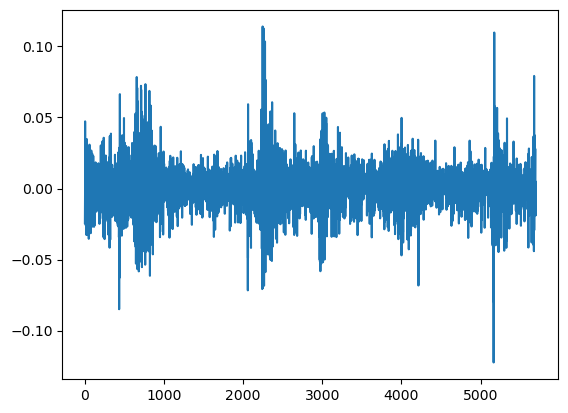

In [4]:
plt.plot(vNpReturns[2,:])
plt.show()

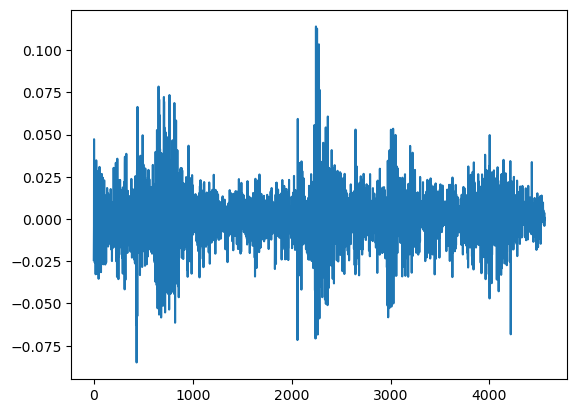

In [5]:
plt.plot(vTrain[2,:])
plt.show()

In [37]:
len(vTrain[0,:])

4559

In [41]:
1.02562336e-01 +  9.10480266e-01

1.013042602

In [20]:


# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Symbol', 'Mean', 'Standard Deviation', 'Minimum', 'Maximum',
                                   '25% Quantile', '50% Quantile', '75% Quantile', 'T-Test T-statistic',
                                   'T-test P-value', 'JB statistic', 'JB p-value', 'ADF statistic',
                                   'ADF p-value'])

# Loop over each stock
for i in range(3):
    # Calculate basic statistics
    mean_returns = vNpReturns[i, :].mean()
    std_returns = vNpReturns[i, :].std()
    min_returns = vNpReturns[i, :].min()
    max_returns = vNpReturns[i, :].max()
    quantiles_returns = np.percentile(vNpReturns[i, :], [25, 50, 75])

    # Perform t-test
    t_statistic, p_value = ttest_1samp(vNpReturns[i, :], 0)

    # Perform Jarque-Bera test for normality
    jb_statistic, jb_p_value = jarque_bera(vNpReturns[i, :])

    # Test for stationarity using Augmented Dickey-Fuller test
    adf_statistic, adf_p_value, _, _, adf_critical_values, _ = adfuller(vNpReturns[i, :])
    print(adf_critical_values)

    # Create a DataFrame to store the statistics for the current stock
    statistics_df = pd.DataFrame({
        'Symbol': pd.Series(symbols[i], index=[i]),
        'Mean': pd.Series(mean_returns, index=[i]),
        'Standard Deviation': pd.Series(std_returns, index=[i]),
        'Minimum': pd.Series(min_returns, index=[i]),
        'Maximum': pd.Series(max_returns, index=[i]),
        '25% Quantile': pd.Series(quantiles_returns[0], index=[i]),
        '50% Quantile': pd.Series(quantiles_returns[1], index=[i]),
        '75% Quantile': pd.Series(quantiles_returns[2], index=[i]),
        'T-Test T-statistic': pd.Series(t_statistic, index=[i]),
        'T-test P-value': pd.Series(p_value, index=[i]),
        'JB statistic': pd.Series(jb_statistic, index=[i]),
        'JB p-value': pd.Series(jb_p_value, index=[i]),
        'ADF statistic': pd.Series(adf_statistic, index=[i]),
        'ADF p-value': pd.Series(adf_p_value, index=[i]),
    })

    # Append the statistics to the results DataFrame
    results_df = results_df.append(statistics_df, ignore_index=True)

# Print the results in LaTeX format
print(results_df[['Symbol', 'Mean', 'Standard Deviation', 'Minimum', 'Maximum',
                                   '25% Quantile', '50% Quantile', '75% Quantile']].to_latex(index=False))

print(results_df[['Symbol','T-Test T-statistic',
                                   'T-test P-value', 'JB statistic', 'JB p-value', 'ADF statistic',
                                   'ADF p-value']].to_latex(index=False))


{'1%': -3.431517016913905, '5%': -2.8620557075519577, '10%': -2.5670445096450734}
{'1%': -3.4315122463251218, '5%': -2.862053599829436, '10%': -2.5670433876395307}
{'1%': -3.4315114206360713, '5%': -2.8620532350264476, '10%': -2.567043193443735}
\begin{tabular}{lrrrrrrr}
\toprule
Symbol &     Mean &  Standard Deviation &    Minimum &   Maximum &  25\% Quantile &  50\% Quantile &  75\% Quantile \\
\midrule
  \textasciicircum AEX & 0.001047 &            1.392743 & -11.375838 & 10.028274 &     -0.603941 &      0.054516 &      0.659243 \\
  \textasciicircum BFX & 0.004061 &            1.268118 & -15.327546 &  9.333983 &     -0.556642 &      0.036430 &      0.631631 \\
\textasciicircum GDAXI & 0.013034 &            1.478006 & -13.054859 & 10.797468 &     -0.655716 &      0.075881 &      0.734678 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrr}
\toprule
Symbol &  T-Test T-statistic &  T-test P-value &  JB statistic &  JB p-value &  ADF statistic &  ADF p-value \\
\midrule
  \textasciic

C:\Users\onim-\AppData\Local\Temp\ipykernel_29052\664898738.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(statistics_df, ignore_index=True)
C:\Users\onim-\AppData\Local\Temp\ipykernel_29052\664898738.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(statistics_df, ignore_index=True)
C:\Users\onim-\AppData\Local\Temp\ipykernel_29052\664898738.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(statistics_df, ignore_index=True)
C:\Users\onim-\AppData\Local\Temp\ipykernel_29052\664898738.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for forma

In [19]:
ttest_1samp(vNpReturns[i, :], 0)


TtestResult(statistic=1.2174588496657703, pvalue=0.22348010041024882, df=5698)

In [24]:
adfuller(vNpReturns[i, :])

(-29.339855445683607,
 0.0,
 6,
 5692,
 {'1%': -3.431499376581697,
  '5%': -2.8620479137538415,
  '10%': -2.567040360769439},
 -31779.081980786126)

ValueError: Unknown style: 'o'

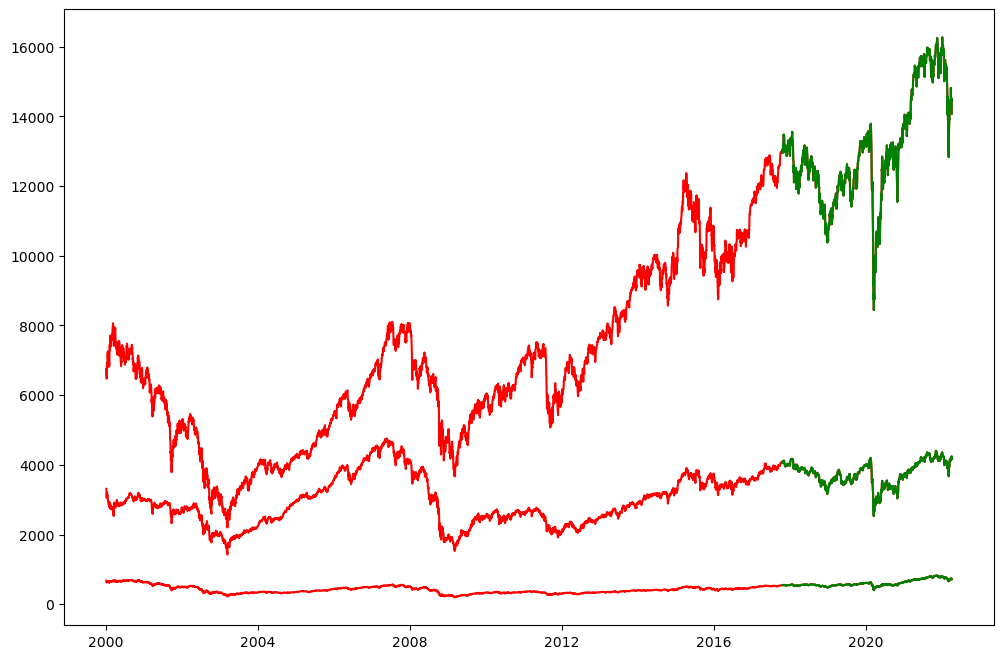

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Adjust the size as per your preference
plt.figure(figsize=(12, 8))

# Plotting the data
plt.plot(vPrices['^AEX'], label='^AEX', color='red')
plt.plot(vPrices['^BFX'], label='^BFX', color='red')
plt.plot(vPrices['^GDAXI'], label='^GDAXI', color='red')

# Finding the index corresponding to the first 80% of the data
num_points = len(vPrices['^AEX'])
end_index = int(0.8 * num_points)

# Plotting the remaining portion in green
plt.plot(vPrices['^AEX'][end_index:], color='green')
plt.plot(vPrices['^BFX'][end_index:], color='green')
plt.plot(vPrices['^GDAXI'][end_index:], color='green')

# Adding labels close to the lines
plt.annotate('^AEX', xy=(end_index, vPrices['^AEX'][end_index]), xytext=(end_index + 100, vPrices['^AEX'][end_index]),
             color='green', arrowprops=dict(facecolor='green', arrowstyle='-'))
plt.annotate('^BFX', xy=(end_index, vPrices['^BFX'][end_index]), xytext=(end_index + 100, vPrices['^BFX'][end_index]),
             color='green', arrowprops=dict(facecolor='green', arrowstyle='->'))
plt.annotate('^GDAXI', xy=(end_index, vPrices['^GDAXI'][end_index]), xytext=(end_index + 100, vPrices['^GDAXI'][end_index]),
             color='green', arrowprops=dict(facecolor='green', arrowstyle='o'))

# Adding title and labels
plt.title('Stock Prices Comparison')
plt.xlabel('Time')
plt.ylabel('Price €')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [7]:
vPrices

,^AEX,^BFX,^GDAXI
Date,,,
2000-01-03,675.440002,3311.050049,6750.759766
2000-01-04,642.250000,3172.209961,6586.950195
2000-01-05,632.309998,3057.530029,6502.069824
2000-01-06,624.210022,3061.090088,6474.919922
2000-01-07,644.859985,3138.550049,6780.959961
...,...,...,...
2022-04-01,728.000000,4200.009766,14446.480469
2022-04-04,737.799988,4227.339844,14518.160156
2022-04-05,736.020020,4242.799805,14424.360352


# Histograms etc

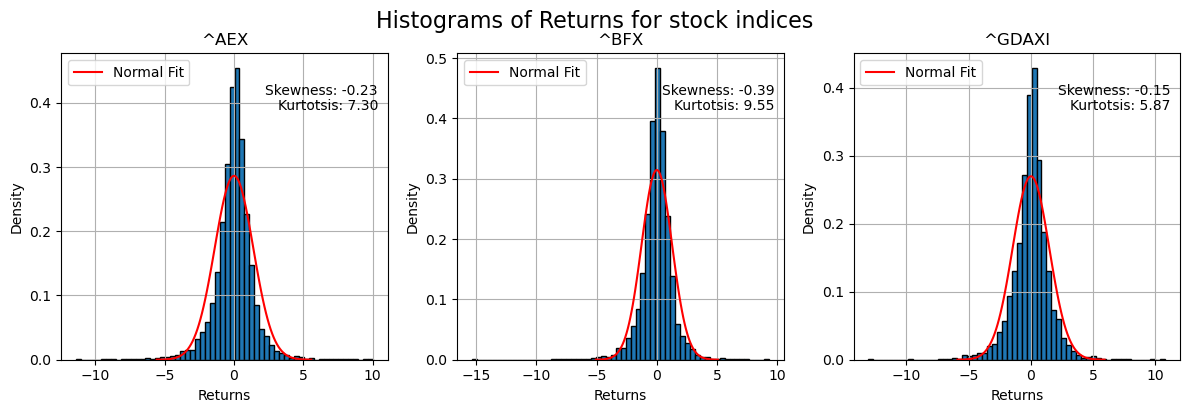

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm

symbols = ['^AEX', '^BFX', '^GDAXI']
# vNpReturns = np.random.randn(3, 1000)  # Example data, replace with your own

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Create a subplot with 1 row and 3 columns

for i in range(3):
    axs[i].hist(vNpReturns[i, :], bins=60, edgecolor="black", density=True)
    axs[i].set_title(symbols[i])
    axs[i].set_xlabel("Returns")
    axs[i].set_ylabel("Density")
    axs[i].grid(True)
    axs[i].text(0.97, 0.9, f"Skewness: {skew(vNpReturns[i, :]):.2f}", ha='right', va='top',
                transform=axs[i].transAxes)
    axs[i].text(0.97, 0.85, f"Kurtotsis: {kurtosis(vNpReturns[i, :]):.2f}", ha='right', va='top',
            transform=axs[i].transAxes)
    
    # Fit normal distribution to sample mean and variance
    mean = np.mean(vNpReturns[i, :])
    std = np.std(vNpReturns[i, :])
    x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
    y = norm.pdf(x, mean, std)
    axs[i].plot(x, y, 'r-', label='Normal Fit')
    
    axs[i].legend(loc='upper left')  # Set the legend to the top-left corner

    # axs[i].text(0.05, 0.95, f"Skewness: {skew(vNpReturns[i, :]):.2f}", ha='left', va='top',
    #             transform=axs[i].transAxes)
    
plt.tight_layout()
plt.suptitle("Histograms of Returns for stock indices", fontsize=16, y=1.02)
plt.show()

# Sample Correlation

In [4]:
# Calculate sample correlations
correlations = np.corrcoef(vTrain)

# Get the corresponding symbols
corresponding_symbols = ['^AEX', '^BFX', '^GDAXI']

# Assuming you have already defined the variables mentioned in your question

# Calculate sample correlations
correlations = pd.DataFrame(vNpReturns).transpose().corr()

# Set the column names and index to corresponding symbols
correlations.columns = corresponding_symbols
correlations.index = corresponding_symbols

# Print the correlations DataFrame
print(correlations)


            ^AEX      ^BFX    ^GDAXI
^AEX    1.000000  0.851814  0.871865
^BFX    0.851814  1.000000  0.795747
^GDAXI  0.871865  0.795747  1.000000


In [5]:
print(correlations.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      \textasciicircum AEX &      \textasciicircum BFX &    \textasciicircum GDAXI \\
\midrule
\textasciicircum AEX   &  1.000000 &  0.851814 &  0.871865 \\
\textasciicircum BFX   &  0.851814 &  1.000000 &  0.795747 \\
\textasciicircum GDAXI &  0.871865 &  0.795747 &  1.000000 \\
\bottomrule
\end{tabular}



C:\Users\onim-\AppData\Local\Temp\ipykernel_13544\2994591494.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(correlations.to_latex())
